In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y = df["label"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,test_size=0.30,random_state=42,stratify=y_encoded)

In [4]:

hyperparamaters = {
    "max_depth": list(range(1, 11))  # probamos profundidades de 1 a 10
}

dt = DecisionTreeClassifier(random_state=42)

grid_decisiontree = GridSearchCV(estimator=dt,param_grid=hyperparamaters,cv=5,scoring="accuracy",n_jobs=-1)

grid_decisiontree.fit(X_train, y_train)

best_decision_tree = grid_decisiontree.best_estimator_
print("Best hyperparameters:", grid_decisiontree.best_params_)

Best hyperparameters: {'max_depth': 10}


In [5]:
y_pred = best_decision_tree.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

In [7]:
print("\n" + "="*50 + "\n")
print("Accuracy (Decision Tree):", accuracy)
print("F1 Score (Decision Tree):", f1)
print("Recall (Decision Tree):", recall)
print("Precision (Decision Tree):", precision)
print("\n" + "="*50 + "\n")



Accuracy (Decision Tree): 0.9803030303030303
F1 Score (Decision Tree): 0.9802154824331339
Recall (Decision Tree): 0.9803030303030303
Precision (Decision Tree): 0.9817535958664991




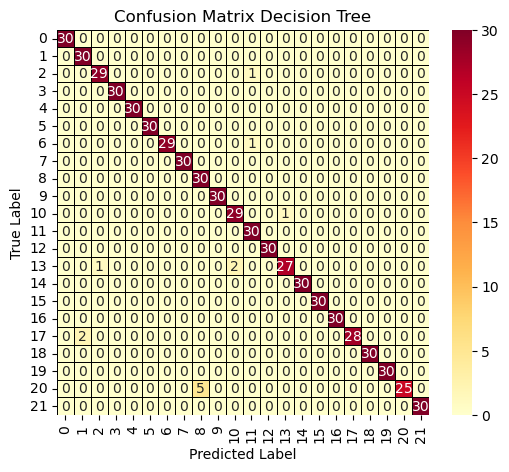

In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor="black")
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

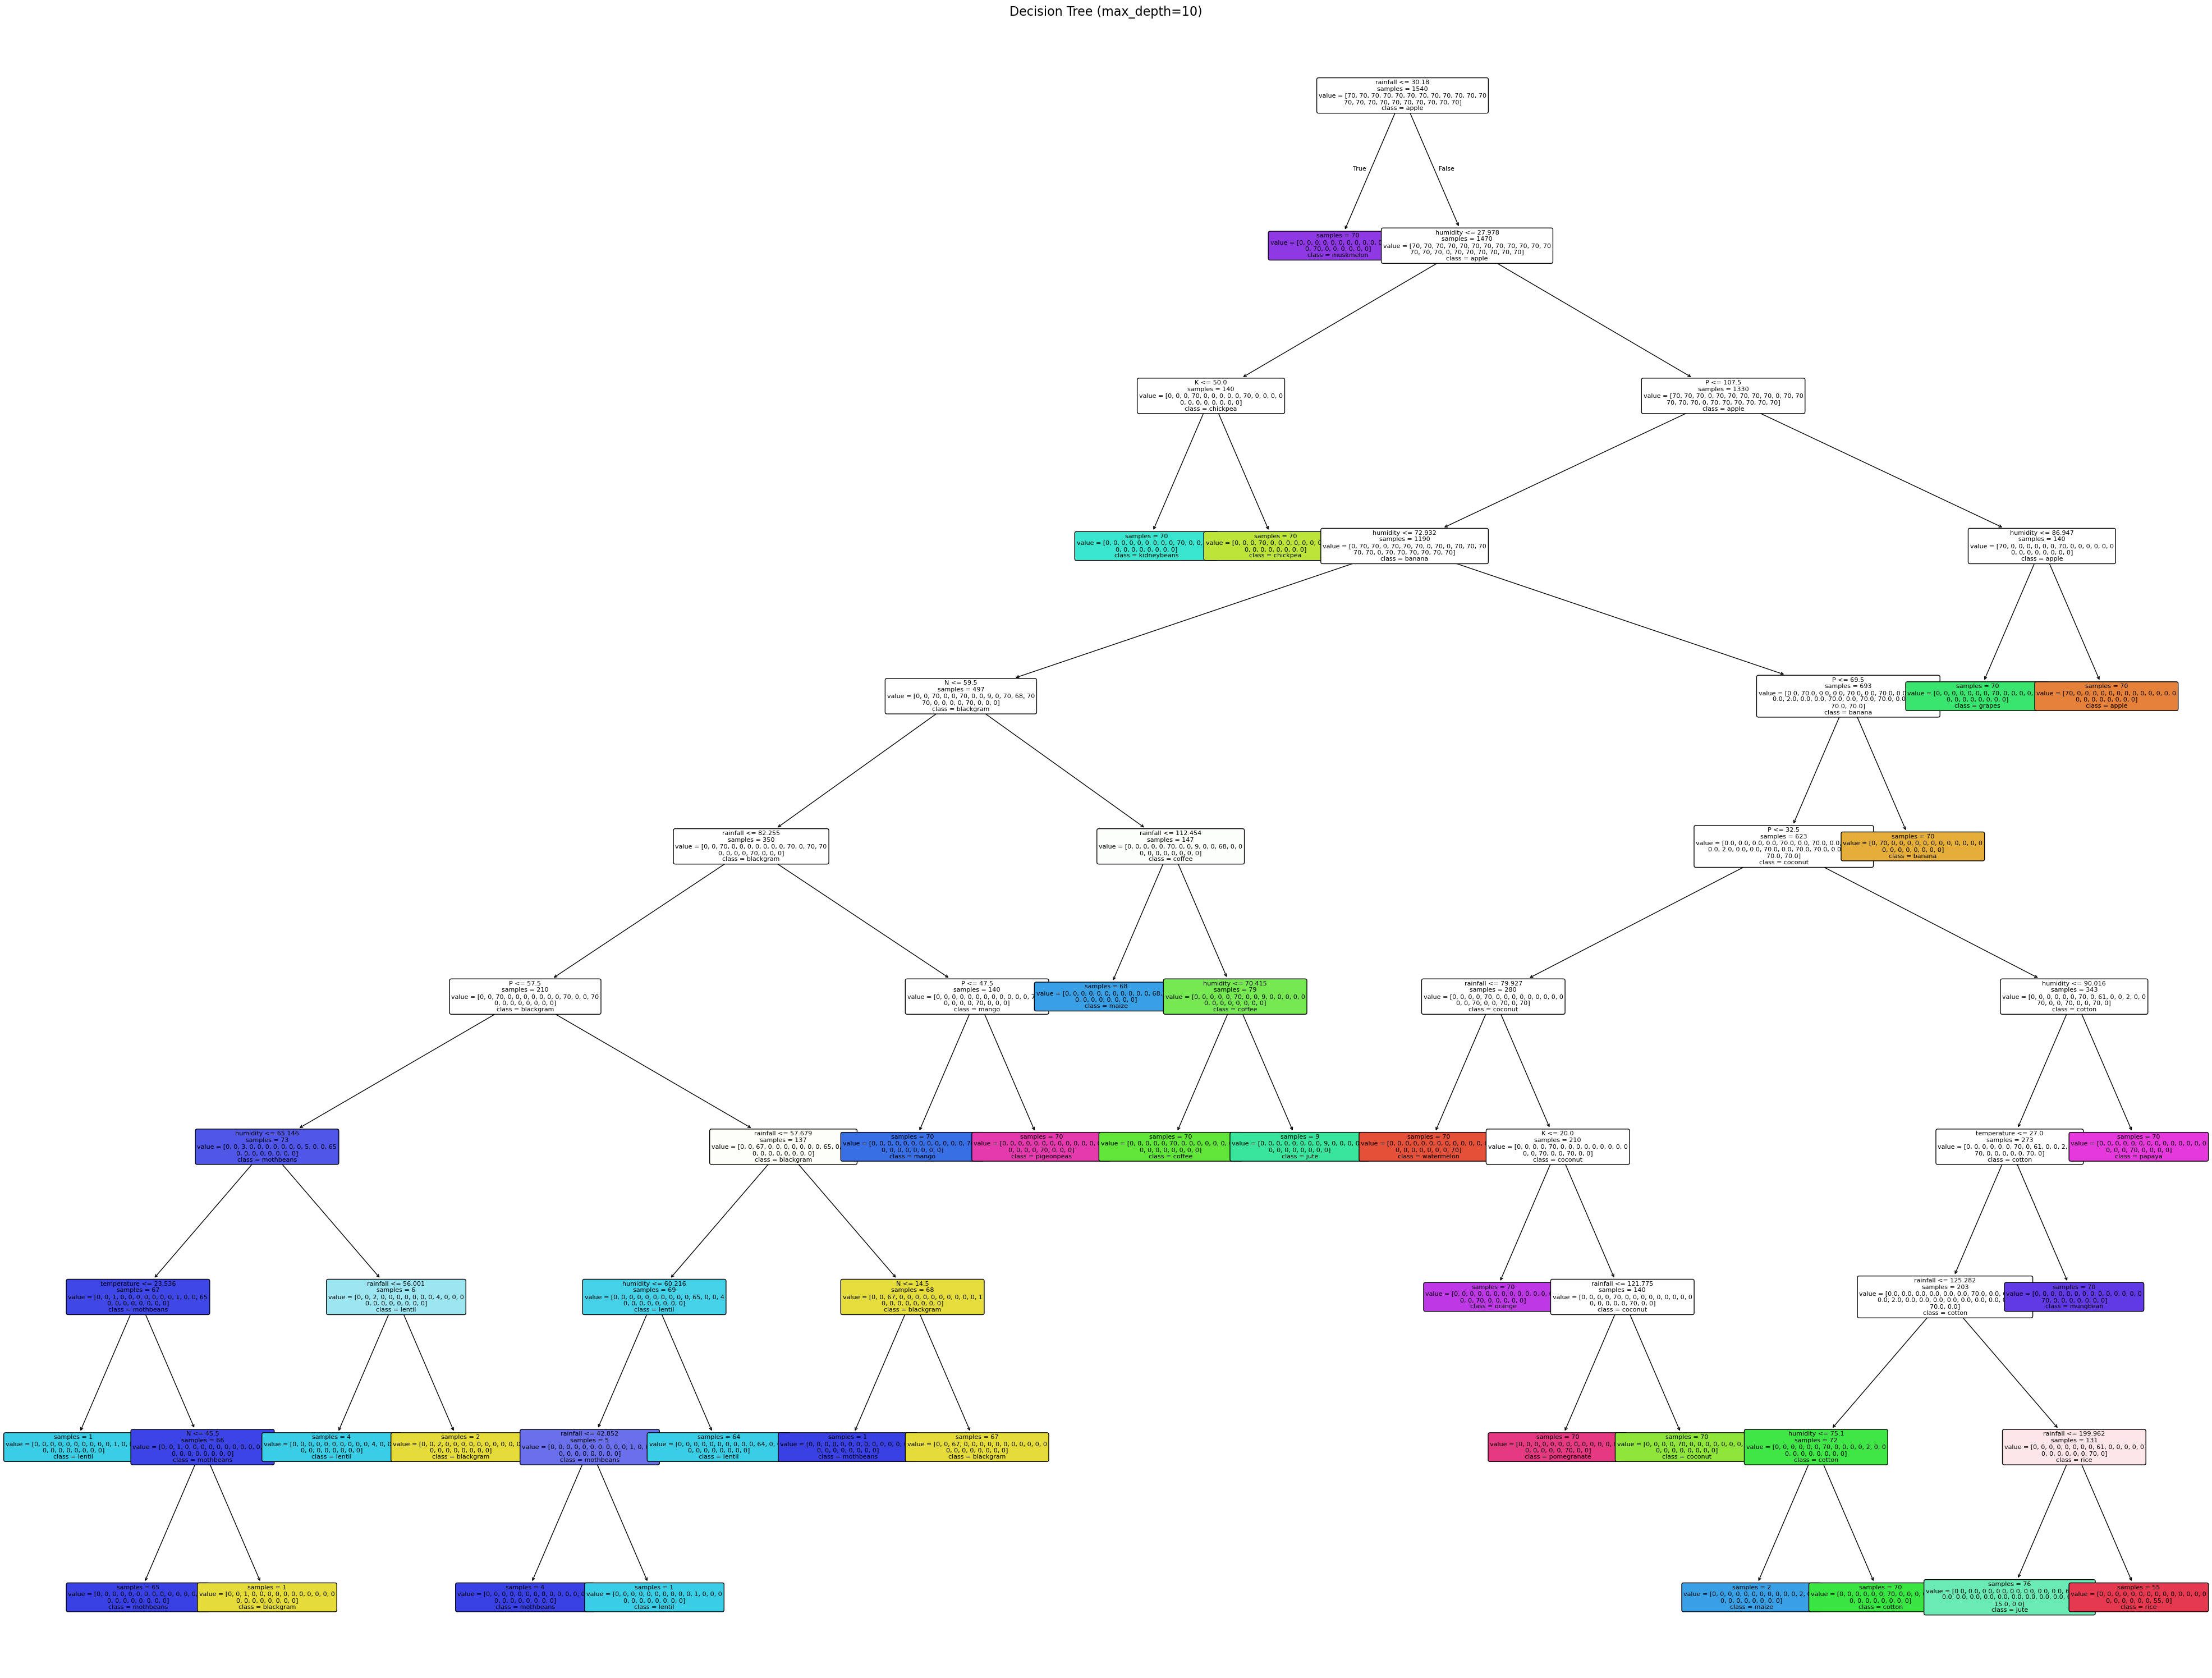

In [ ]:
plt.figure(figsize=(40, 30))
plot_tree(best_decision_tree,feature_names=list(X.columns),class_names=label_encoder.classes_,filled=True,rounded=True,fontsize=8,     impurity=False)
plt.title(f"Decision Tree (max_depth={grid_decisiontree.best_params_['max_depth']})", fontsize=16)
plt.tight_layout()                   
plt.show()